<a href="https://colab.research.google.com/github/amir-jafari/SOM/blob/main/examples/Tabular/Iris/iris_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # Install NNSOM
    !pip install --upgrade NNSOM

  Attempting uninstall: NNSOM
    Found existing installation: NNSOM 1.1.4
    Uninstalling NNSOM-1.1.4:
      Successfully uninstalled NNSOM-1.1.4


In [2]:
from NNSOM.plots import SOMPlots
from NNSOM.utils import *
import matplotlib.pyplot as plt

In [3]:
# Random State
from numpy.random import default_rng
SEED = 1234567
rng = default_rng(SEED)

In [4]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data
y = iris.target

# Preprocessing data
X = X[rng.permutation(len(X))]
y = y[rng.permutation(len(X))]

scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
X = np.transpose(X)

Loading Pre-trained SOM

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os

model_path = "/content/drive/MyDrive/Colab Notebooks/NNSOM/Examples/Iris/"
trianed_file_name = "SOM_Model_iris_Epoch_500_Seed_1234567_Size_4.pkl"

# SOM Parameters
SOM_Row_Num = 4  # The number of row used for the SOM grid.
Dimensions = (SOM_Row_Num, SOM_Row_Num) # The dimensions of the SOM grid.

som = SOMPlots(Dimensions)
som = som.load_pickle(trianed_file_name, model_path)

Visualization

Data Preparation to pass additional variables

In [7]:
# persentage of sentosa
proportion_sentosa = []
for i in range(som.numNeurons):  # S is the total number of neurons
    cluster_indices = som.clust[i]
    sentosa_in_cluster = 0

    # Count how many indices in this cluster are in sentosa
    for index in cluster_indices:
        if y[index] == 0:
            sentosa_in_cluster += 1

    # Calculate the proportion of sentosa in this cluster
    if len(cluster_indices) > 0:
        proportion = sentosa_in_cluster / len(cluster_indices)
    else:
        proportion = 0  # Avoid division by zero if the cluster is empty

    # Add the calculated proportion to the list
    proportion_sentosa.append(proportion)

# Get percentatges for each neuron
perc_sentosa = np.array(proportion_sentosa) * 100
perc_sentosa1 = (np.array(proportion_sentosa) * 100).astype(int)

In [8]:
# Closest Class for each cluster
closest_class = []
for i in range(som.numNeurons):
    cluster_indices = som.clust[i]
    if len(cluster_indices) > 0:
        closest_class.append(y[cluster_indices[0]])
    else:
        closest_class.append(None)

In [9]:
# Target value in each cluster
target_in_cluster = []
for i in range(som.numNeurons):
    cluster_indices = som.clust[i]
    if len(cluster_indices) > 0:
        target_in_cluster.append(y[cluster_indices])
    else:
        target_in_cluster.append(None)

Grey Hist

Darker: More Sentosa

Lighter: Less Sentosa

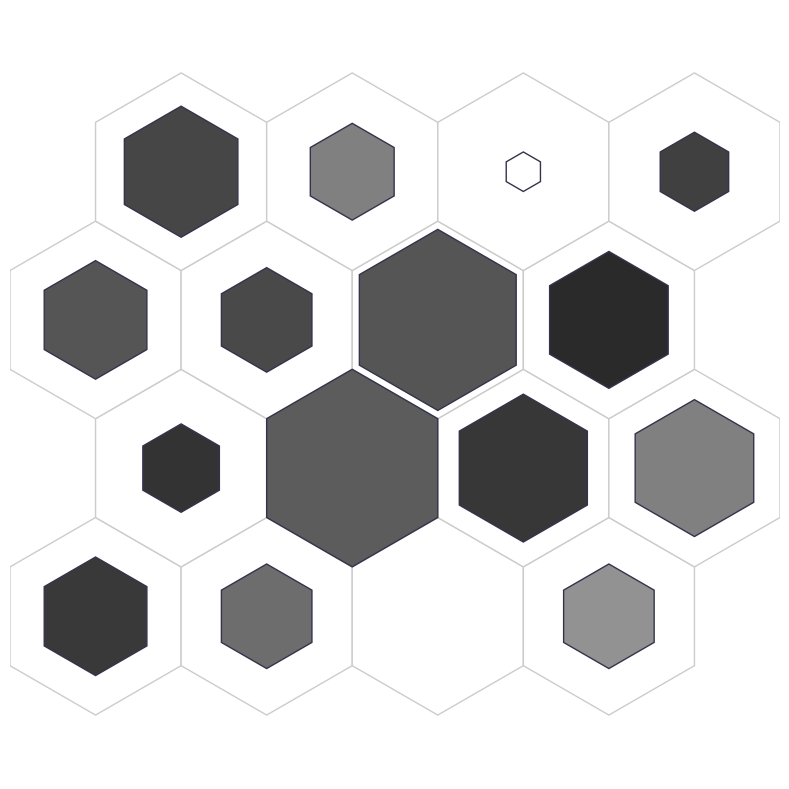

In [10]:
# Visualization
fig, ax, pathces, text = som.gray_hist(X, perc_sentosa)
plt.show()

Color Hist

Color Shade: Close to Red indicates more sentosa

/usr/local/lib/python3.10/dist-packages/NNSOM/plots.py:267: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ticktext)


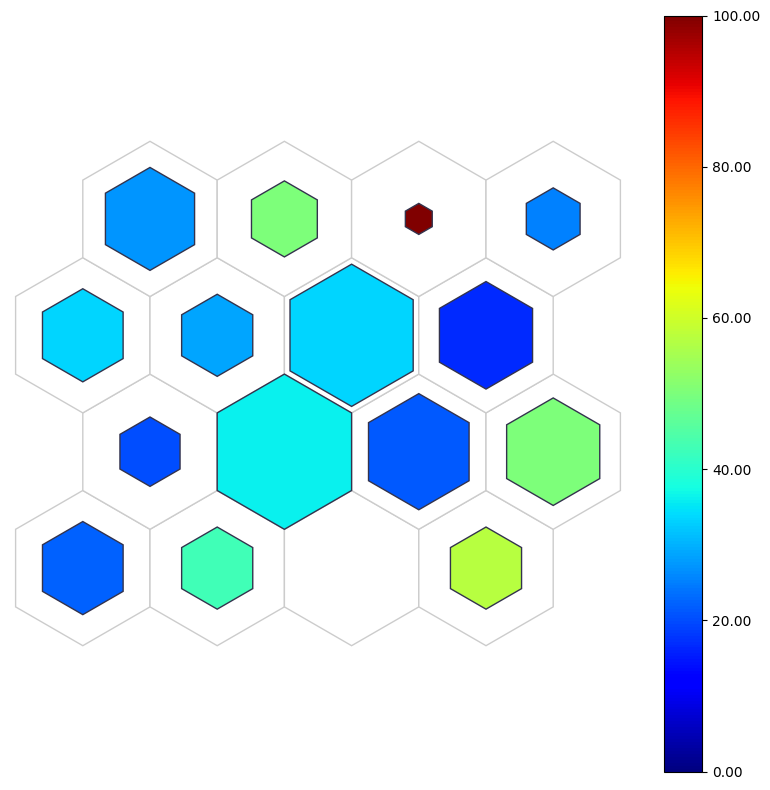

In [11]:
fig, ax, pathces, text = som.color_hist(X, perc_sentosa)
plt.show()

Multiplot - Pie Chart

The distribution of three classes in each cluster


In [12]:
# Data Preprocessing for additional Variable
# Using the target in cluster, create the size list for pie chart for each cluster
pie_chart_sizes = []
for cluster in target_in_cluster:
    if cluster is not None:
        # Count the occurrences of each target value
        size = [list(cluster).count(i) for i in range(3)]  # Assuming 3 unique values: 0, 1, 2
        pie_chart_sizes.append(size)
    else:
        pie_chart_sizes.append([0, 0, 0])  # Represent an empty cluster

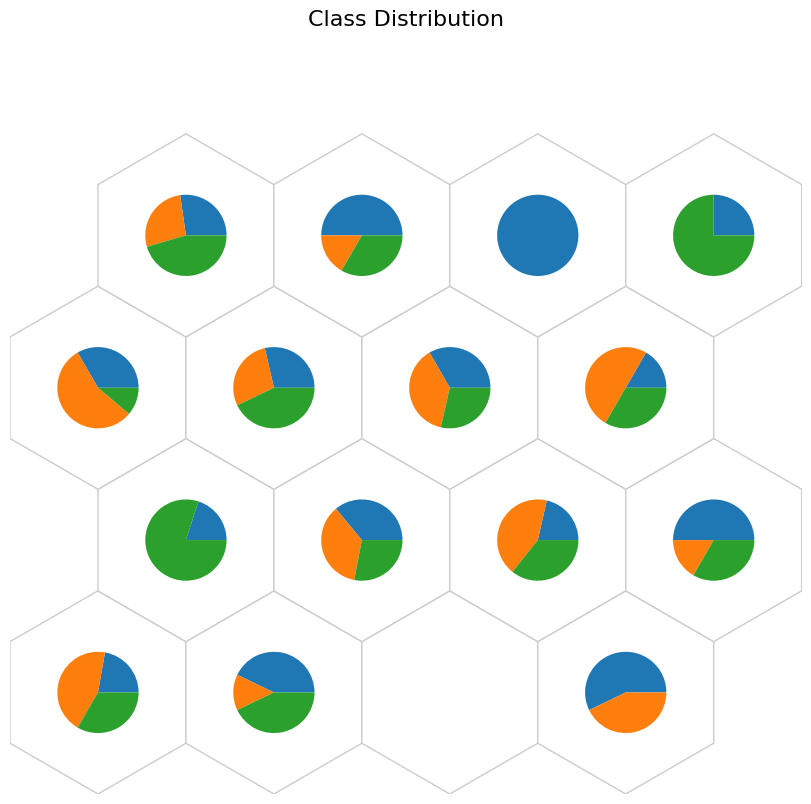

In [13]:
fig, ax, h_axes = som.multiplot('pie', "Class Distribution", perc_sentosa, pie_chart_sizes)

Multiplot - dist

Distribution of Categories

x: Categories (0: sentosa, 1: versicolor, 2: virginica)

y: count for each class

In [15]:
dist_1 = []
dist_2 = []
for cluster in target_in_cluster:
    if cluster is not None:
        # Use numpy to count occurrences of each class
        counts = [np.sum(cluster == 0), np.sum(cluster == 1), np.sum(cluster == 2)]
        dist_1.append([0, 1, 2])
        dist_2.append(counts)
    else:
        dist_1.append([0, 1, 2])
        dist_2.append([0, 0, 0])

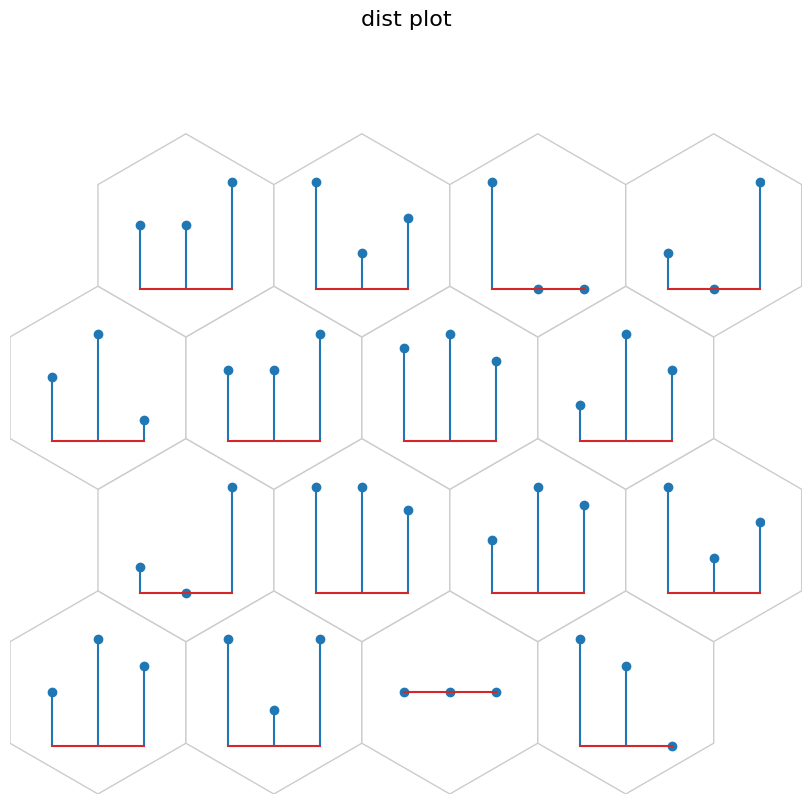

In [16]:
fig, ax, h_axes = som.multiplot('stem', dist_1, dist_2)
plt.show()

Multiplot - hist

In [17]:
sepal_length_in_cluster = []
for i in range(som.numNeurons):
    cluster_indices = som.clust[i]
    if len(cluster_indices) > 0:
        sepal_length_in_cluster.append(iris.data[cluster_indices, 0])
    else:
        sepal_length_in_cluster.append([0])

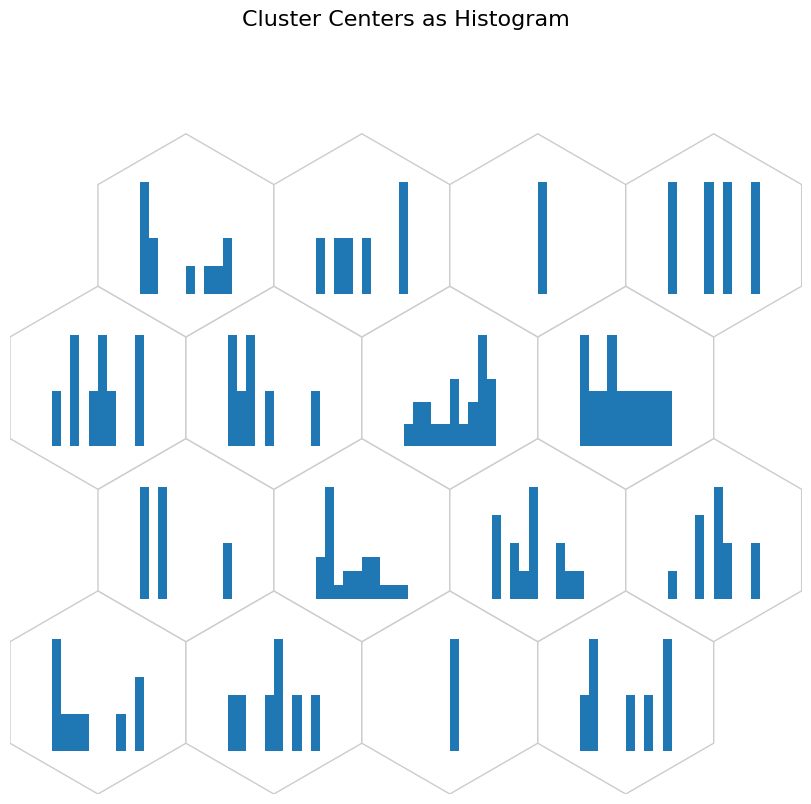

In [18]:
fig, ax, h_axes = som.multiplot('hist', sepal_length_in_cluster)
plt.show()

Multiplot - boxplot

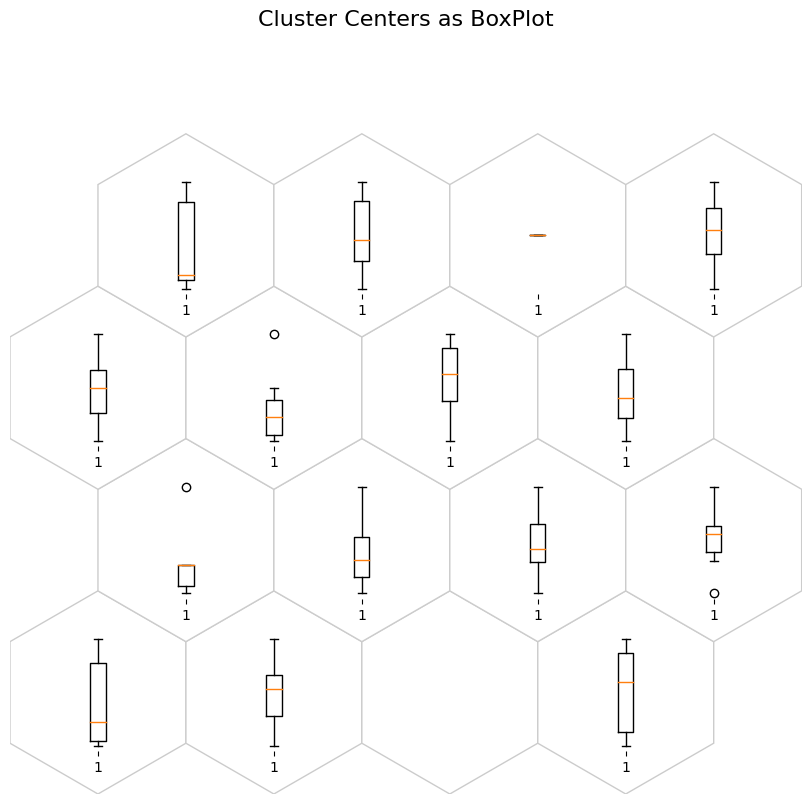

In [19]:
fig, ax, h_axes = som.multiplot('boxplot', sepal_length_in_cluster)
plt.show()

Multiplot - violin

In [20]:
# Input Data Preprocessing
# Create the matrix for each cluster where the items in the hit cluster
iris_cluster = []
for i in range(som.numNeurons):
    cluster_indices = som.clust[i]
    if len(cluster_indices) > 0:
        # Make sure cluster_indices are integers and within the range of iris.data
        cluster_indices = np.array(cluster_indices, dtype=int)
        # Index iris.data using cluster_indices
        cluster_data = iris.data[cluster_indices]
        iris_cluster.append(cluster_data)
    else:
        iris_cluster.append(np.array([]))  # Use an empty array for empty clusters

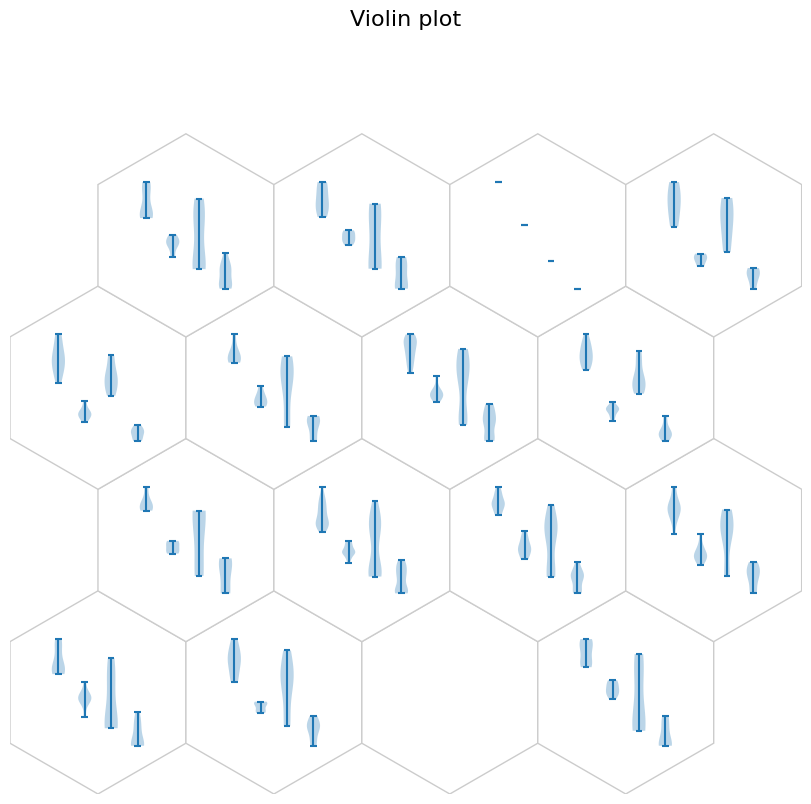

In [21]:
fig, ax, h_axes = som.multiplot('violin', iris_cluster)
plt.show()

Scatter Plot

x-axis: Petal Length

y-axis: Petal Width

/usr/local/lib/python3.10/dist-packages/NNSOM/plots.py:843: RankWarning: Polyfit may be poorly conditioned
  m, p = np.polyfit(x1_temp, x2_temp, 1)


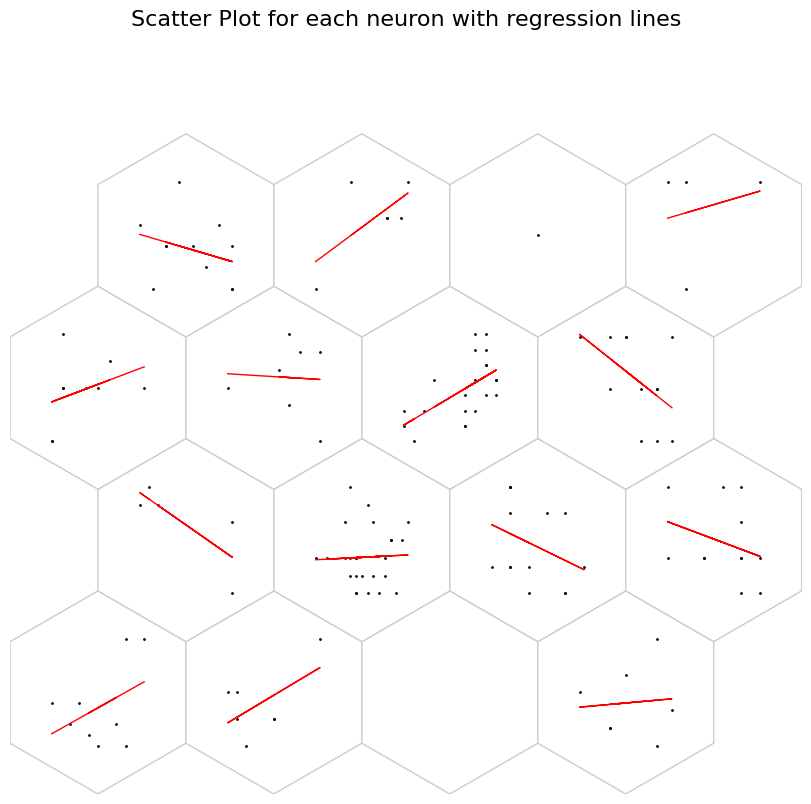

In [22]:
fig, axes, h_axes = som.plt_scatter(X, (0, 1))
plt.show()